In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

We want to be able to experiment with expectation values for various estimators for different underlying populations.
First, let's write a routine that returns the sample mean and variance for an input sample. Let's do this using numpy
array arithmetic, but only using the sum() method. These should be calculated using:$\bar x = {1\over N} \Sigma x_i$ and $\sigma^2 = {1\over N-1}\Sigma (x_i-\bar x)^2$. You have to fill in the missing code:

In [44]:
def stats(sample) :
    """ Return the sample mean and standard deviation of an input sample"""
    # calculation of mean and variance here
    n=len(sample)   
    mean= sum(sample)/n
    variance= sum((sample-mean)**2)/(n-1)
    
    return mean, variance

Let's now write a routine that will generate a sample of input size, with an option for using either a uniform or a Gaussian (normal) distribution. Here we will consider a uniform distribution with values distributed between 0 and 1, and a normal distribution with zero mean and unit standard deviation. Samples for these distributions can be generated using the [numpy.random.uniform()](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.uniform.html) function or the [numpy.random.normal()](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.normal.ht) function; you have to fill in the missing function calls:

In [45]:
def getsample(size,uniform) :
    """Generate a sample of input size from a uniform distribution (0-1) 
       if uniform is True, else a normal distribution with zero mean
       and unit standard deviation
    """
    if uniform :
        sample = np.random.uniform(0,1,size)
        
    else :
        sample = np.random.normal(0,1,size)
             
    return sample

Let's do a quick test of your routines. Generate a sample using the getsample() routine (test both uniform and normal), use stats() to get the mean and variance. Check the results using the numpy.mean() and [numpy.var()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html) methods on the samples. Check the samples by looking at a histogram. Do this for both a uniform and a normal distribution. You have to choose the sample size and the distribution type, and set bins for the histogram accordingly:


calculated mean:    0.50   variance:  0.0844
numpy mean:    0.50   numpy variance  0.0844


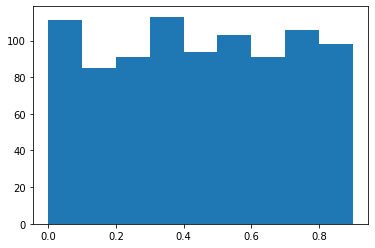

In [48]:
n= 1000  # choose a sample size here
uniform= True   #  boolean to set type of distribution here
sample=getsample(n,uniform=uniform)
xmin=0
xmax=1
delta=0.1
plt.hist(sample,bins=np.arange(xmin,xmax,delta))  # set appropriate bins here using xmin,xmax,delta
mean,variance=stats(sample)
print('calculated mean: {:7.2f}   variance: {:7.4f}'.format(mean,variance))
print('numpy mean: {:7.2f}   numpy variance {:7.4f}'.format(sample.mean(),sample.var()))
if not np.isclose(sample.mean(),mean) : print('PROBLEM WITH MEAN!')
#if not np.isclose(sample.var(ddof=0),variance) : print('PROBLEM WITH VARIANCE? How does numpy compute variance by default?')
if not np.isclose(sample.var(ddof=1),variance) : print('PROBLEM WITH VARIANCE? How does numpy compute variance by default?')
#print('np.mean:' + str(np.mean(sample)),'np.variance:' + str(np.var(sample,ddof=1)))

Experiment with running this multiple times, with different sample sizes, say from 10 points per sample to 1000 points per sample. 

What did you learn about the numpy variance method (which is also true for the standard deviation method)?What do you think about your distributions and your estimators? How do they change with size of the sample?

<B>ANSWER HERE:</B>   

The numpy variance method calculates the biased variance (i.e, it does not have the (N-1) in the denominator). To make it an unbiased calculation of the variance, you need to add "ddof=1" as a keyword.

For a uniform distribution, as you increase the size of the sample, the mean approaches 0.5 and the variance approaches 0.083. The histogram also shows that all of the bins approach the sample number.  I would say that the mean represents the actual mean of the distribution and is a good estimator of the distribution.

For a normal distribution, it follows a Gaussian distribution. As you increase the samples, the mean approaches 0 and the variance approaches 1. Also, the distribution in the histogram appears skewed to the left in that most of the samples fall into the first bin at 0 and then it slowly decreases.

What are the true values of the mean and variance for a uniform distribution? Calculate them analytically.  Do you get these values exactly with your samples? Why or why not?

<B>ANSWER HERE:</B>   

If by "true values" you mean population values, then the mean should be u = sum(x)/N. By looking at the uniform distribution, one can see that the distribution seems close to equally distributed on both sides of the 0.5 bin. This means that the true mean is 0.5, which does match with the mean calculated above with the samples.  As for the variance, you can use o^2 = (x-u)^2/(n-1) or E(x^2) - [E(x)]^2 = sum(x_i)^2/N - (u)^2 = (x_f-x_i)^2/12. This would be 0.083, which does match with the number calculated above.

This is because the mean will approach the true mean given a large number of samples. Because the variance involves the mean, this is true for the variance, as well.


OK, now let's generate some expectation values. To do this, let's write a routine to generate a large number of samples (nsamp), each of size n, calculate the sample mean and variance for each, then average these together to get the expectation value. So, the expectation value of the mean is the "mean mean", and the expectation value of the variance is the "mean variance". Let's also calculate the "mean standard deviation". You have to fill in the expressions to calculate the expectation values:

In [90]:
def expectations(nsamp,n,uniform=True) :
    """ Calculate expectation values by drawing nsamp samples, each one with n members
        and calculcating expectation values by averaging the statistics from each sample
    """
    all_means=[]
    all_variances=[]
    all_std=[]
    for i in range(nsamp) :
        sample=getsample(n,uniform=uniform)
        mean,variance=stats(sample)
        all_means.append(mean)
        all_variances.append(variance)
        all_std.append(np.sqrt(variance))
    all_means=np.array(all_means)
    all_variances=np.array(all_variances)
    all_std=np.array(all_std)
    
    expectation_mean= sum(all_means)/nsamp         #add expressions
    expectation_variance= sum(all_variances)/(nsamp-1)
    expectation_std= np.sqrt(expectation_variance)
    
    return expectation_mean,expectation_variance,expectation_std

Do some tests of your routine:

In [91]:
nsamp= 10000
n= 2
m,v,s=expectations(nsamp,n)
print(m,v,s)

0.5005682424683723 0.08267325726283675 0.28752957632709153


Try running this for a large number of samples, for a range of different sample sizes. Make plots of these expectation values as a function of sample size

0.5000886940655834 0.0833591321332338 0.2887198159691049


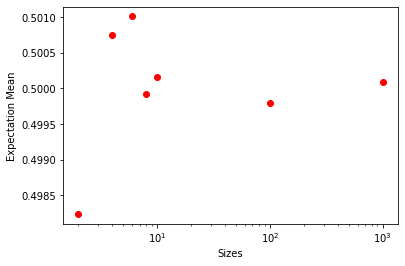

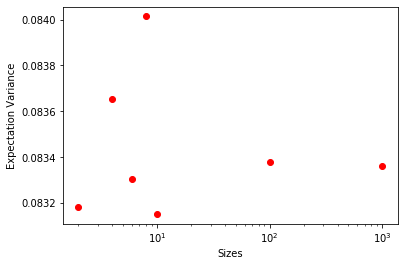

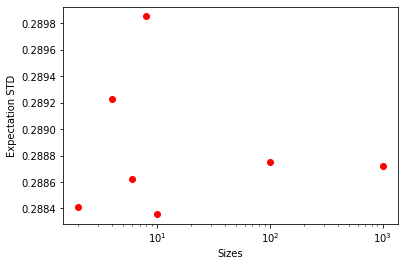

In [85]:
nsamp=10000
sizes=[2,4,6,8,10,100,1000]
all_expectation_mean=[]
all_expectation_variance=[]
all_expectation_std=[]
for n in sizes :
    m,v,s=expectations(nsamp,n)
    all_expectation_mean.append(m)
    all_expectation_variance.append(v)
    all_expectation_std.append(s)

plt.figure()
plt.plot(sizes,all_expectation_mean,'ro')
plt.xscale('log')
plt.xlabel('Sizes')
plt.ylabel('Expectation Mean')

plt.figure()
plt.plot(sizes,all_expectation_variance,'ro')
plt.xscale('log')
plt.xlabel('Sizes')
plt.ylabel('Expectation Variance')

plt.figure()
plt.plot(sizes,all_expectation_std,'ro')
plt.xscale('log')
plt.xlabel('Sizes')
plt.ylabel('Expectation STD')
print(m,v,s)


Are the expectation values of the mean, variance, and standard deviation biased or unbiased? Are they consistent (converge to correct value as n increases)?


<B> ANSWER HERE: </B>

The expectation values of the mean, variance, and standard deviation are unbiased because they show the true values given that you are using a large sample. Additionally, the expectation of the variance depends on the true mean, which is unbiased; thus, the variance and by extension the standard deviation would be unbiased as well. These values are consist and eventually do converge to the correct value as the sizes, n, increase of 0.5, 0.083, and 0.288, respectively. 

OK, now lets consider the variance of the estimators. What do you expect for the standard deviation of the mean (standard error of the mean)?

<B> ANSWER HERE:</B>

The standard deviation of the mean is the sample standard deviation divided by the square root of nsamp. The standard deviation of the mean shows the precision of our estimated mean.



Let's calculate a bunch of means, and look at their spread and variance

0.029782967298775793


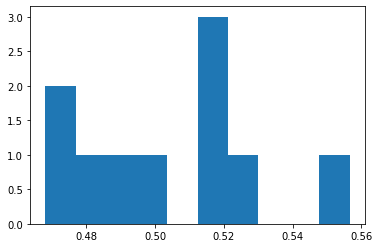

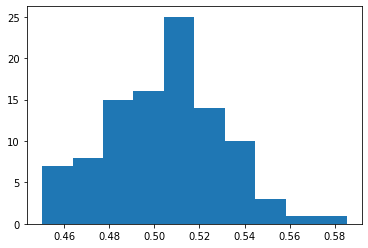

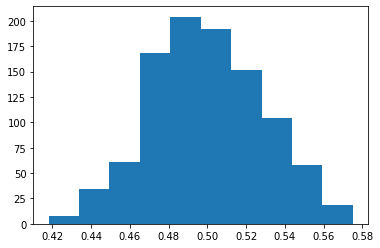

In [103]:
def getmeans(nsamp,n,uniform=True) :
    """return an array of sample means for input number of samples and sample sizes
    """
    all_means=[]
    for i in range(nsamp) :
        sample=getsample(n,uniform=uniform)
        mean,variance=stats(sample)
        all_means.append(mean)
    return np.array(all_means)

# experiment with different values of nsamp, n, uniform


print(np.array(all_means).std())


all_means2 = getmeans(nsamp=10,n=100,uniform=True);
plt.figure()
plt.hist(all_means2);
plt.show()

all_means3 = getmeans(nsamp=100,n=100,uniform=True);
plt.figure()
plt.hist(all_means3);
plt.show()

all_means= getmeans(nsamp=1000,n=100,uniform=True);
plt.figure()
plt.hist(all_means);
plt.show()


How does the variance in the mean depend on the sample size? Calculate the standard deviation for a number of sample sizes, 
and plot as a function of sample size to check the behavior:

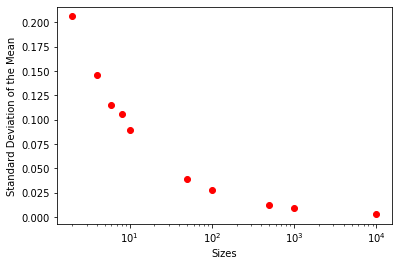

In [104]:
# add code here

sizes=[2,4,6,8,10,50,100,500,1000,10000]
means = []
stds = []
for n in sizes :
    m = getmeans(nsamp=1000,n=n,uniform=True)
    means.append(m)
    stds.append(m.std())


plt.figure()
plt.plot(sizes,stds,'ro')
plt.xscale('log')
plt.xlabel('Sizes')
plt.ylabel('Standard Deviation of the Mean')
plt.show()


What if you calculated the median instead of the mean? What would you expect for the standard deviation of the median as compared with that of the mean? As a function of sample size?

<B>ANSWER HERE:</B>

As sample size increases, the standard variance in the mean tends towards 0, which implies that for a large sample, we have a true estimate of the mean. The standard variance of the median would be similar to the plot above. I qouls expect that we would see a similar trend.

Now do the same experiment for the median of each sample. Write a getmedians() routine like getmeans() above. You can use np.median(sample) instead of your stats routine to calculate the median of an individual sample. Make the plot of variances as a function of sample size.

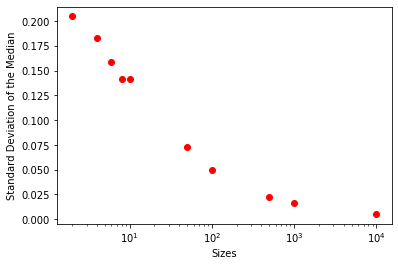

In [107]:
# add code here

def getmedian(nsamp,n,uniform=True) :
    """return an array of sample medians for input number of samples and sample sizes
    """
    all_medians=[]
    for i in range(nsamp) :
        sample=getsample(n,uniform=uniform)
        median=np.median(sample)
        all_medians.append(median)
    return np.array(all_medians)


sizes=[2,4,6,8,10,50,100,500,1000,10000]
medians = []
stds = []
for n in sizes :
    m = getmedian(nsamp=1000,n=n,uniform=True)
    medians.append(m)
    stds.append(m.std())


plt.figure()
plt.plot(sizes,stds,'ro')
plt.xscale('log')
plt.xlabel('Sizes')
plt.ylabel('Standard Deviation of the Median')
plt.show()




Did it come out as expected?

Yes,it did.

You can continue with this for other estimators. What about the midrange estimator for the population mean? Sigma-clipped values? What about the 
mean absolute deviation for the population standard deviation? or the interquartile range?

In [ ]:
# open-ended code, analysis and discussion here!